# Data Science Final Project

# Introduction

In this project, I aim to further the analysis for my arts and jobs paper. The overall research question is: what drives growth, jobs or amenities? Do people follow jobs or amenities or both? 

Using regression analysis in the previous paper, I found that arts are drivers of growth. However, it is stronger in some places than others; for example, in more populated areas, or areas with more college graduates. But what really are the underelying variables that would distinguish the influence of the arts in one places than in others? What variables would be more relevant in the jobs and amenities to explain growth? In other words, <b> why are arts where they are?</b>

With over 50 control variables available, I would like to know which ones would help describe the changes better than only the main regression variables. And here I use some methods to see what variables could explain the impact of the arts on the growth of jobs. 

In [1]:
#Loading the packages

%matplotlib inline
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans, DBSCAN

# The Data

The main data show the number of arts and non-arts jobs per zip code. The data is from the County Business Patterns, from the Census, and data ranges from 1998 to 2014. 

In [2]:
#Loading the datafile. This is just a sample of the data. N=500
df = pd.read_csv("nomiss_sample.csv")

# Dropping unnecessary variables (Some string variables too, like names of the zip code location)
df.drop(['pctba90', 'racediversity90', 'medrent90', 'medhhinc90', 'meantrav90', 'meanlengthres90', 'pctsamehouse90',
'pctfemale90', 'pctmarried90', 'pctchild90', 'pctunemp90', 'diversityanc90', 'pctrental90', 'pctpov90', 'pctbike90',
'pctdrove90', 'pctwalk90', 'density1990', 'housingdensity1990', 'Pop1990', 'Unnamed: 0','JobsT_1998', 'ArtsW_1998', 'JobsW_1998', 
'ArtSupport_1998', 'JobsT_1999', 'ArtsW_1999', 'JobsW_1999', 'ArtSupport_1999', 'JobsT_2000', 'ArtsW_2000', 'JobsW_2000',
 'ArtSupport_2000', 'JobsT_2001', 'ArtsW_2001', 'JobsW_2001', 'ArtSupport_2001', 'JobsT_2002', 'ArtsW_2002', 'JobsW_2002',
 'ArtSupport_2002', 'JobsT_2003', 'ArtsW_2003', 'JobsW_2003', 'ArtSupport_2003', 'JobsT_2004', 'ArtsW_2004', 'JobsW_2004',
 'ArtSupport_2004', 'JobsT_2005', 'ArtsW_2005', 'JobsW_2005', 'ArtSupport_2005', 'JobsT_2006', 'ArtsW_2006', 'JobsW_2006',
 'ArtSupport_2006', 'JobsT_2007', 'ArtsW_2007', 'JobsW_2007', 'ArtSupport_2007', 'JobsT_2008', 'ArtsW_2008', 'JobsW_2008',
 'ArtSupport_2008', 'JobsT_2009', 'ArtsW_2009', 'JobsW_2009', 'ArtSupport_2009', 'JobsT_2010', 'ArtsW_2010', 'JobsW_2010',
 'ArtSupport_2010', 'JobsT_2011', 'ArtsW_2011', 'JobsW_2011', 'ArtSupport_2011', 'JobsT_2012', 'ArtsW_2012', 'JobsW_2012',
 'ArtSupport_2012', 'JobsT_2013', 'ArtsW_2013', 'JobsW_2013', 'ArtSupport_2013', 'JobsT_2014', 'ArtsW_2014',
 'JobsW_2014', 'ArtSupport_2014', 'ARTGOSLG98', 'City', 'State', 'Location', 'zipcode'], axis=1, inplace=True)

# Creating a change variables for the arts
df['arts_change'] = df['ArtsN_2014'] - df['ArtsN_1998']

In [4]:
#Listing the variables in the data.b
list(df.columns.values)

['zip',
 'ArtsN_1998',
 'JobsN_1998',
 'ArtsN_1999',
 'JobsN_1999',
 'ArtsN_2000',
 'JobsN_2000',
 'ArtsN_2001',
 'JobsN_2001',
 'ArtsN_2002',
 'JobsN_2002',
 'ArtsN_2003',
 'JobsN_2003',
 'ArtsN_2004',
 'JobsN_2004',
 'ArtsN_2005',
 'JobsN_2005',
 'ArtsN_2006',
 'JobsN_2006',
 'ArtsN_2007',
 'JobsN_2007',
 'ArtsN_2008',
 'JobsN_2008',
 'ArtsN_2009',
 'JobsN_2009',
 'ArtsN_2010',
 'JobsN_2010',
 'ArtsN_2011',
 'JobsN_2011',
 'ArtsN_2012',
 'JobsN_2012',
 'ArtsN_2013',
 'JobsN_2013',
 'ArtsN_2014',
 'JobsN_2014',
 'MedAge2k',
 'pctba2k',
 'racediversity2k',
 'medrent2k',
 'medhhinc2k',
 'meantrav2k',
 'medlengthres2k',
 'pctsamehouse2k',
 'pctfemale2k',
 'pctmarried2k',
 'pctchild2k',
 'pctunemp2k',
 'diversityfb2k',
 'pctrental2k',
 'pctpov2k',
 'pctbike2k',
 'pctdrove2k',
 'pctwalk2k',
 'density2000',
 'housingdensity2000',
 'Pop2000',
 'RentMed',
 'Democ92',
 'NonWhite_90',
 'CollProfLv90',
 'CrimeRate1999county',
 'Traditionalistic',
 'Self_Expressive',
 'Utilitarian',
 'Charismatic

## What are the arts?

The arts are defined as sum of the number of jobs in the following categories: 

<img src="Categories.png" alt="Categories">

But here I only focus on the narrow categories.

In [3]:
#Number of observations, number of variables

df.shape

(500, 77)

### Variables

Below is the data description of the 2014 <b> main variables </b> for the arts and non-arts jobs. 

In [15]:
df.describe()

,zip,ArtsN_1998,JobsN_1998,ArtsN_1999,JobsN_1999,ArtsN_2000,JobsN_2000,ArtsN_2001,JobsN_2001,ArtsN_2002,...,Formality,Exhibitionism,Glamorous,Transgressive,Rational,Locality,State_Scenes,Corporateness,Ethnicity,arts_change
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,42583.684000,150.830000,8940.380000,160.466000,9186.372000,167.50600,9387.514000,174.880000,9478.936000,156.222000,...,428.190351,425.885760,422.153434,380.971538,406.706685,412.728461,408.390568,432.219519,408.493403,37.292000
std,27367.141769,323.254804,9304.431677,342.380288,9650.718247,348.97262,9903.400697,374.091473,10144.184508,305.716112,...,373.947893,370.575748,369.627462,333.706941,354.157323,358.124086,356.844095,379.424845,355.585790,256.700536
min,1013.000000,3.000000,3.000000,3.000000,3.000000,3.00000,0.000000,3.000000,0.000000,3.000000,...,3.000000,3.250000,3.000000,2.750000,3.000000,3.250000,3.000000,3.000000,3.000000,-3073.000000
25%,19117.750000,18.000000,2244.500000,19.000000,2293.250000,19.00000,2319.000000,21.000000,2356.250000,16.000000,...,160.247997,160.513941,156.401442,142.726157,154.257560,157.562317,154.322140,160.095709,154.951172,-10.250000
50%,37897.000000,57.000000,6045.500000,60.000000,6091.500000,67.50000,6141.500000,66.500000,6280.000000,61.000000,...,325.698861,322.408153,319.159864,287.851017,308.450483,314.277590,307.687775,326.498743,306.780798,7.000000
75%,65377.000000,149.000000,12168.500000,158.000000,12656.250000,171.00000,13150.750000,175.250000,12867.250000,171.500000,...,592.038651,588.692797,586.211349,530.333984,563.734064,570.901549,565.753714,597.548034,566.166667,65.000000
max,94041.000000,3375.000000,60042.000000,3383.000000,60907.000000,3431.00000,66534.000000,4312.000000,76758.000000,2784.000000,...,2696.743056,2666.812500,2671.302083,2417.640625,2571.034722,2588.244792,2583.755208,2740.890625,2581.510417,2205.000000


Some of the main <b> control variables </b> are listed below. The first table shows the core variables, which are from Prof. Clark's Scenes Project. 


| Variable | Description  |
|------|------|
| Pop2000 | Population in 2000 |
| CrimeRate1999county | Crime Rate in 1999 | 
| Democ92 | Percent Democrats | 
| RentMed | Median Rent | 
| NonWhite_90 | Percent non white population in 1990 |
| CollProfLv90 | Percent college graduates in 1990 |

In [16]:
# Describing the variables
df[['Pop2000', 'CrimeRate1999county', 'Democ92', 'RentMed', 'NonWhite_90', 'CollProfLv90']].describe()

,Pop2000,CrimeRate1999county,Democ92,RentMed,NonWhite_90,CollProfLv90
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19636.284000,4172.196000,41.663600,445.226000,3123.410000,0.227264
std,14427.529156,2113.478098,9.440388,131.011614,5221.593264,0.137318
min,169.000000,151.000000,17.100000,199.000000,0.000000,0.031375
25%,7965.250000,2522.750000,35.500000,345.750000,177.750000,0.125387
50%,16361.000000,3695.000000,40.300000,424.000000,997.000000,0.184616
75%,27855.250000,5653.000000,47.000000,522.000000,3429.750000,0.291245
max,74948.000000,9834.000000,84.600000,834.000000,38284.000000,0.753073


The table below shows the <b> Scenes variables </b>, which are decoded into 15 dimensions. These variables were created by coders, who gave a score from 1 to 5 on each dimension based on the type of neighborhood (zip code) they were analyzing, and them summed. The coders followed a series of guidelines, but mostly trying to answer the question: <b> does an amenity’s vitality and energy comes from the way it embodies this sub-category? </b> Thus, coding whether an amenity positively or negatively indicated the concrete presence of the sub-category.

The AP variables reflect "amenities performance", on the zip code level.

| Scenes Dimension | Type | Measurement Level | Description (Values) | 
|------|------|
 | Traditionalistic | Numeric | Scale | Appeals to heritage and the past | 
 | Self_expressive | Numeric | Scale | Unique, personal, expression | 
| Utilitarian | Numeric | Scale | Usefulness of its amenities | 
| Charismatic | Numeric | Scale | In the presence of an exceptional personality | 
 | Egalitarian | Numeric | Scale | Universal equality, treating others non-strategically |
 | Neighborly | Numeric | Scale | Closeness, personal networks, face-to-face interactions | 
 | Formality | Numeric | Scale | Fitting into established patterns of social etiquette |
| Exhibitionism | Numeric | Scale | Encourage looking at others and being looked by them in turn |
 | Glamorous | Numeric | Scale | Charm, allure, star power, status | 
 | Transgressive | Numeric | Scale | Revel in shocking others and associating with equally shocking others |
 | Rational | Numeric | Scale | Power to choose one's own fate (organic or planned growth)| 
| Locality | Numeric | Scale | Feeling rooted in a place | 
| State | Numeric | Scale | Role of the State in shaping one's identity | 
 | Corporateness | Numeric | Scale | Corporations as social power that shape identity | 
 | Ethnicity | Numeric | Scale | Shape of pre-reflective identity | 

In [17]:
df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 'Neighborly', 'Formality',
'Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 'Corporateness', 'Ethnicity']].describe()

,Traditionalistic,Self_Expressive,Utilitarian,Charismatic,Egalitarian,Neighborly,Formality,Exhibitionism,Glamorous,Transgressive,Rational,Locality,State_Scenes,Corporateness,Ethnicity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,417.377171,434.301216,392.292006,437.808753,418.064375,416.261428,428.190351,425.885760,422.153434,380.971538,406.706685,412.728461,408.390568,432.219519,408.493403
std,363.143478,382.261930,343.281785,385.144623,363.300658,360.998430,373.947893,370.575748,369.627462,333.706941,354.157323,358.124086,356.844095,379.424845,355.585790
min,3.250000,3.000000,2.500000,3.000000,3.000000,3.000000,3.000000,3.250000,3.000000,2.750000,3.000000,3.250000,3.000000,3.000000,3.000000
25%,156.508065,161.685847,145.027920,163.102697,158.646925,157.591482,160.247997,160.513941,156.401442,142.726157,154.257560,157.562317,154.322140,160.095709,154.951172
50%,315.884978,325.950581,297.807432,331.497271,318.198931,314.161683,325.698861,322.408153,319.159864,287.851017,308.450483,314.277590,307.687775,326.498743,306.780798
75%,576.197917,602.285330,542.777123,611.772682,581.017506,579.726789,592.038651,588.692797,586.211349,530.333984,563.734064,570.901549,565.753714,597.548034,566.166667
max,2615.182292,2756.604167,2498.453125,2792.520833,2615.182292,2606.951389,2696.743056,2666.812500,2671.302083,2417.640625,2571.034722,2588.244792,2583.755208,2740.890625,2581.510417


Other variables of interest are from the <b> Geolytics database </b>, also in the zip code level. Some variables are described in the table below. 

| Variable | Type | Measurement Level | Description  | 
|------|------|
| pctba2k  | Numeric | Scale | Percent Graduated Bachelor Degree in 2000 |
| pctrental2k | Numeric | Scale | Percent Rentals in 2000 | 
| pctmarried2k | Numeric | Scale | Percent of population 15 years and older, married, 2000 | 
| pctchild2k | Numeric | Scale | Percentage of households with children 0-17, 2000 | 
| racediversity2k | Numeric | Scale | Racial diversity index, 2000 |
| medrent2k | Numeric | Scale | Median Gross Rent, 2000 | 
| medhhinc2k | Numeric | Scale | Median Household Income, 2000 |
| meantrav2k | Numeric | Scale | Mean travel time to work in minutes, 2000 |
| medlengthres2k | Numeric | Scale | Median length of residence in housing unit, 2000 |
| pctsamehouse2k | Numeric | Scale | Percentage living in same house, from 1995 to 2000 |
| pctfemale2k | Numeric | Scale | Percentage female, 2000 | 
| pctunemp2k | Numeric | Scale | Percentage of unemployed labor force, 2000 |
| diversityfb2k | Numeric | Scale | Foreign born diversity index, 2000 |
| pctpov2k | Numeric | Scale | Percentage population below poverty level, 2000 |
| pctwalk2k | Numeric | Scale | Percent of people who walk in 2000 | 
| pctbike2k | Numeric | Scale | Percentage biked to work, 2000 |
| pctdrove2k | Numeric | Scale | Percentage drove to work, 2000 |
| density2000 | Numeric | Scale | Population density, 2000 |
| housingdensity2000 | Numeric | Scale | Housing density, 2000 |

In [18]:
# Description of the Geolytics variables

df[['MedAge2k', 'pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k', 'medlengthres2k',
 'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 'pctrental2k',
 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000']].describe()

,MedAge2k,pctba2k,racediversity2k,medrent2k,medhhinc2k,meantrav2k,medlengthres2k,pctsamehouse2k,pctfemale2k,pctmarried2k,pctchild2k,pctunemp2k,diversityfb2k,pctrental2k,pctpov2k,pctbike2k,pctdrove2k,pctwalk2k,density2000,housingdensity2000
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,36.891000,26.909316,0.303079,628.660000,47667.866000,24.797622,6.496000,54.990751,51.107193,57.934490,32.991680,5.056689,0.529804,30.812538,10.616542,0.292774,89.348023,2.806996,2066.432098,863.736676
std,4.740388,15.625101,0.217207,256.902523,20646.054933,5.994989,2.798866,10.743090,2.039138,8.762532,7.813197,2.983801,0.175180,16.516941,7.455272,0.482455,8.788051,4.169013,3701.035893,1524.912647
min,23.600000,3.491858,0.000000,0.000000,13750.000000,9.270833,1.000000,16.486903,41.011469,26.544868,4.219409,0.000000,0.000000,1.749781,0.000000,0.000000,18.479222,0.000000,0.274497,0.193285
25%,33.900000,14.615629,0.111948,464.000000,34334.250000,20.658239,4.000000,48.395124,50.204079,52.874223,28.356874,3.111566,0.465759,20.080954,4.701980,0.000000,87.787440,1.005617,136.484131,60.820234
50%,36.900000,22.620498,0.253954,578.000000,42141.500000,24.179289,6.000000,56.414344,51.220897,59.766381,32.748370,4.369898,0.599565,27.171007,8.817120,0.144529,91.854515,1.788778,671.308444,285.174755
75%,39.725000,36.713185,0.485239,724.500000,55754.000000,28.559107,8.000000,62.810957,52.231527,63.815563,37.598388,6.013019,0.650161,37.722073,14.070782,0.358641,94.310450,3.320211,2711.326603,1127.422629
max,60.900000,89.264582,0.820607,2001.000000,200001.000000,49.492559,20.000000,78.911565,58.937824,78.486029,59.903148,25.687871,0.738424,93.349726,43.606904,3.433408,97.850163,61.007958,38914.335750,16976.740659


## Plots

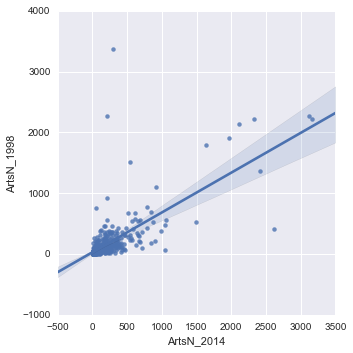

In [19]:
sns.lmplot(x="ArtsN_2014", y="ArtsN_1998", data=df)
sns.plt.show()

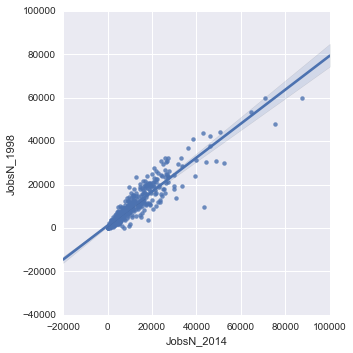

In [20]:
sns.lmplot(x="JobsN_2014", y="JobsN_1998", data=df)
sns.plt.show()

# Models

Differently from the analysis on the paper, in this project, the research question is: why are arts where they are? What makes some places more attractive for the arts than others?

1. Linear regression model (I and II)
2. Cross validation
3. Decision trees
4. Random forest
5. Cluster Analysis
6. Autocorrelation
7. Time Series

## Linear Regression Model I

I start here with the linear regression model, since it is the simplest method to fitting the data. This was also used in my previous paper. The equation of this regression is: 

<center> $ Arts_{2014} = \alpha + \beta * Arts_{1998} + \gamma * Jobs_{1998} + Control Variables + \epsilon $ </center>

I first start with only education as a control variable. 

In [21]:
# Using sklearn to run the simple regression model with education (CollProfLv90)
# Does education have any influence in the growth of arts?

from sklearn import linear_model, metrics

X = df[["JobsN_1998", "ArtsN_1998", "CollProfLv90"]]
X = sm.add_constant(X)
y = df["ArtsN_2014"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ArtsN_2014   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 22 Nov 2016   Prob (F-statistic):           4.04e-89
Time:                        18:12:11   Log-Likelihood:                -3434.3
No. Observations:                 500   AIC:                             6877.
Df Residuals:                     496   BIC:                             6893.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -59.4785     21.761     -2.733   

We see that all three independent variables are significant, so we can assume that education, non-arts jobs, and the arts had an impact in the growth of arts; with education having the highest impact of all three. This shows that on average education is important for the development of the arts, however, what else is?

### Cross Validation

In [22]:
from sklearn import cross_validation

kf = cross_validation.KFold(len(df), n_folds=5, shuffle=True)

mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index])))
    scores.append(lm.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 26006.8330418
R2: 0.563593194513
Model 2
MSE: 70355.1748735
R2: 0.562943790602
Model 3
MSE: 28765.6762841
R2: 0.561023673766
Model 4
MSE: 114362.707859
R2: 0.52128007516
Model 5
MSE: 95173.2147666
R2: 0.553535496771
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 66932.721365
Mean of R2 for all folds: 0.552475246162


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The cross-validation R2 for all folds are close to the R2 from the original model, so we can assume the original model is good.

## Linear Regression Model II

In this second part, all the core variables are added as independent variables, to see which variables caused an impact on the arts.

In [23]:
# Defining variables
X = df[["JobsN_1998", "ArtsN_1998", "CollProfLv90", "CrimeRate1999county", "Democ92", "RentMed", "NonWhite_90"]]
y = df["ArtsN_2014"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical outpbut
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ArtsN_2014   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     138.5
Date:                Tue, 22 Nov 2016   Prob (F-statistic):          3.91e-112
Time:                        18:12:11   Log-Likelihood:                -3432.8
No. Observations:                 500   AIC:                             6880.
Df Residuals:                     493   BIC:                             6909.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
JobsN_1998              0.0074    

We see that again only education is significant on the impact of the arts, while the other variables show a p-value of over .05. 

If we remove rent, percent white, and crime rate, we have that percent democrats also have an impact on the arts.

In [24]:
# Defining variables
X = df[["JobsN_1998", "ArtsN_1998", "CollProfLv90", "Democ92"]]
y = df["ArtsN_2014"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical outpbut
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ArtsN_2014   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     241.3
Date:                Tue, 22 Nov 2016   Prob (F-statistic):          6.86e-115
Time:                        18:12:11   Log-Likelihood:                -3434.6
No. Observations:                 500   AIC:                             6877.
Df Residuals:                     496   BIC:                             6894.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
JobsN_1998       0.0075      0.001      5.986   

Now all the variables are significant at 95%.

### Cross Validation

Setting up the cross-validation method for 5 folds, on the data with the core variables.

In [25]:
from sklearn import cross_validation

kf = cross_validation.KFold(len(df), n_folds=5, shuffle=True)

mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index])))
    scores.append(lm.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 24204.7642847
R2: 0.563037575498
Model 2
MSE: 15711.5248482
R2: 0.563984058685
Model 3
MSE: 52854.6084311
R2: 0.559518127955
Model 4
MSE: 56263.7583391
R2: 0.552842224913
Model 5
MSE: 152534.326505
R2: 0.554789736678
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 60313.7964817
Mean of R2 for all folds: 0.558834344746


However, the cross-validation shows that the R2 is lower than the original linear model, and closer to the first linear regression model, so I would have my doubts on keeping the Democ92 variable. 

## Models with Scenes Dimensions

Here I add the scenes dimensions variables. 

In [26]:
#Dependent variable is arts: how did jobs and the other variables influence the growth of arts?
#Using sklearn to run the regression model with all the Scenes dimensions

from sklearn import linear_model

X = df[["JobsN_1998", "ArtsN_1998", 'Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity']]
X = sm.add_constant(X)
y = df["ArtsN_2014"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ArtsN_2014   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     51.10
Date:                Tue, 22 Nov 2016   Prob (F-statistic):           3.11e-96
Time:                        18:12:11   Log-Likelihood:                -3384.5
No. Observations:                 500   AIC:                             6805.
Df Residuals:                     482   BIC:                             6881.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -43.2552     20.117  

And we see here that even though the R2 is high, most of the variables are not significant. So I run decision trees and random forests in order to see which variables are more important for the arts. 

## Decision Trees

### The Scenes variables

Here we look for the feature importances of the scenes variables for changes in the arts. So what traits helped for and increase or decrease in the number of arts jobs in a zip code?

In [27]:
X = df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 
        'State_Scenes', 'Corporateness', 'Ethnicity']]
y = df['arts_change']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
7,Exhibitionism,0.169560
6,Formality,0.121241
11,Locality,0.108274
2,Utilitarian,0.076579
0,Traditionalistic,0.067897
13,Corporateness,0.059494
9,Transgressive,0.055105
1,Self_Expressive,0.053760
8,Glamorous,0.052706
3,Charismatic,0.043160


We see that exhibitionism is the most important zip code trait for the arts; followed by formality, locality, utilitarian, and traditionalism. 

In [28]:
from sklearn.model_selection import cross_val_score

# Get the cross validated accuracy score for each of three cross validation folds
dt_scores = cross_val_score(dt, X, y)

# Take the mean of these scores
print round(dt_scores.mean(), 5)

//anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:579: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.03384


The cross validation score is very low, but it might be due to the diversity of the variables included in the analysis; that might be contradicting among each other.

If we consider only the variables where there was increase in the arts, then we see that self-expressive, utilitarian, corporateness, ethnicity, and locality became more important for the arts. 

In [29]:
positive_arts = df[df.arts_change > 0]

X = positive_arts[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 
        'State_Scenes', 'Corporateness', 'Ethnicity']]
y = positive_arts['arts_change']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
1,Self_Expressive,0.138780
2,Utilitarian,0.094884
13,Corporateness,0.093569
14,Ethnicity,0.092340
11,Locality,0.092047
9,Transgressive,0.072939
8,Glamorous,0.070726
10,Rational,0.067538
4,Egalitarian,0.058883
12,State_Scenes,0.044346


And if we compare to the zipcodes where the arts had a decrease, we see that ethnicity, transgressive, utilitarian, locality, and formality were the important traits. 

In [30]:
negative_arts = df[df.arts_change <= 0]

X = negative_arts[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 
        'State_Scenes', 'Corporateness', 'Ethnicity']]
y = negative_arts['arts_change']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
14,Ethnicity,0.138557
9,Transgressive,0.115751
2,Utilitarian,0.102640
11,Locality,0.094221
6,Formality,0.092916
10,Rational,0.082584
3,Charismatic,0.061379
13,Corporateness,0.055372
12,State_Scenes,0.048284
4,Egalitarian,0.044362


In conclusion, we can say that the ethnicity, locality or utilitan wouldn't steer the arts in one way or another (because they are present on the top of the feature importances of both positive and negative arts), but that self-expression and corporateness is favorable for the arts, while transgressive and formality are unfavorable for the arts. 

#### Visualizing decision tree

The code to visualize the decision tree is below. However, we need a software called graphviz, and the decision tree is so large that it is impractical to paste it here. 

In [31]:
# from sklearn.tree import export_graphviz

# export_graphviz(dt, out_file='tree5.dot')

### Geolytics and core variables

On this analysis, we add the other control variables: the socio-economic variables, and habits. Conducting the same analysis as before. 

In [32]:
X = df[['MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 
        'pctrental2k', 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]

y = df['arts_change']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
6,pctsamehouse2k,0.096247
4,medhhinc2k,0.094606
22,NonWhite_90,0.079842
9,pctchild2k,0.067938
19,Pop2000,0.066705
11,diversityfb2k,0.064173
15,pctdrove2k,0.046487
16,pctwalk2k,0.041820
5,meantrav2k,0.037973
14,pctbike2k,0.036025


Here we see that the most important traits are for people to be living in the same house for the last 5 years, the median income, population diversity and density. Again, the cross validation score is low. 

In [33]:
from sklearn.model_selection import cross_val_score

# Get the cross validated accuracy score for each of three cross validation folds
dt_scores = cross_val_score(dt, X, y)

# Take the mean of these scores
round(dt_scores.mean(), 5)

0.01115

And now dividing the data into the positive and negative arts changes, we have that walkability, stability of households, and presence of children are favorable for the arts; while percent non white, percent rental, and median age helped for decreases in the arts. 

In [34]:
positive_arts = df[df.arts_change > 0]

X = positive_arts[['MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 
        'pctrental2k', 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]

y = positive_arts['arts_change']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
16,pctwalk2k,0.117540
6,pctsamehouse2k,0.114276
9,pctchild2k,0.099848
5,meantrav2k,0.068653
0,MedAge2k,0.049613
10,pctunemp2k,0.047429
4,medhhinc2k,0.045504
21,Democ92,0.042232
14,pctbike2k,0.042113
8,pctmarried2k,0.035640


In [35]:
from sklearn.model_selection import cross_val_score

# Get the cross validated accuracy score for each of three cross validation folds
dt_scores = cross_val_score(dt, X, y)

# Take the mean of these scores
round(dt_scores.mean(), 5)

0.03243

In [36]:
negative_arts = df[df.arts_change <= 0]

X = negative_arts[['MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 
        'pctrental2k', 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]

y = negative_arts['arts_change']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
22,NonWhite_90,0.180915
12,pctrental2k,0.087891
0,MedAge2k,0.069240
16,pctwalk2k,0.063078
20,RentMed,0.058490
11,diversityfb2k,0.052860
15,pctdrove2k,0.045069
3,medrent2k,0.044379
6,pctsamehouse2k,0.042498
14,pctbike2k,0.039146


In [37]:
from sklearn.model_selection import cross_val_score

# Get the cross validated accuracy score for each of three cross validation folds
dt_scores = cross_val_score(dt, X, y)

# Take the mean of these scores
round(dt_scores.mean(), 5)

0.08974

### Arts and jobs variables

Here we look at which years or variables were more important to attracting the arts. Is arts what attract the arts, or do jobs help too? In this case, I use the Arts in 2014 as dependent variable, as it is the outcome, instead of the arts change. 

In [38]:
X = df[[ 'ArtsN_1998', 'JobsN_1998', 'ArtsN_1999', 'JobsN_1999', 'ArtsN_2000', 'JobsN_2000', 'ArtsN_2001', 'JobsN_2001',
 'ArtsN_2002', 'JobsN_2002', 'ArtsN_2003', 'JobsN_2003', 'ArtsN_2004', 'JobsN_2004', 'ArtsN_2005', 'JobsN_2005',
 'ArtsN_2006', 'JobsN_2006', 'ArtsN_2007', 'JobsN_2007', 'ArtsN_2008', 'JobsN_2008', 'ArtsN_2009', 'JobsN_2009',
 'ArtsN_2010', 'JobsN_2010', 'ArtsN_2011', 'JobsN_2011', 'ArtsN_2012', 'JobsN_2012', 'ArtsN_2013', 'JobsN_2013']]

In [39]:
y = df['ArtsN_2014']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
30,ArtsN_2013,0.434073
28,ArtsN_2012,0.065460
31,JobsN_2013,0.041972
14,ArtsN_2005,0.033362
24,ArtsN_2010,0.030493
18,ArtsN_2007,0.026790
7,JobsN_2001,0.025269
3,JobsN_1999,0.024971
12,ArtsN_2004,0.024515
11,JobsN_2003,0.023258


Of course arts in 2013 would be of the highest impact for arts in 2014, however, it is surprising to see that arts in 2005, 2010, and 2007 are so much closer to the top, as well as jobs in 2001 and 1999. 

## Random Forest

Instead of just a decision tree, we now try the random forest algorithm. 

In [40]:
X = df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity']]
y = df['arts_change']

# Initialize a LogisticRegression object (one line below):

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print rf_scores

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + str(round(rf_scores.mean(), 3))

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

[ 0.00996678  0.024       0.02702703]
mean of cross validation scores: 0.02


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
2,Utilitarian,0.071552
13,Corporateness,0.071203
11,Locality,0.068690
8,Glamorous,0.068112
6,Formality,0.067931
9,Transgressive,0.067773
10,Rational,0.066669
7,Exhibitionism,0.065996
1,Self_Expressive,0.065664
3,Charismatic,0.065513


In [41]:
positive_arts = df[df.arts_change > 0]

X = positive_arts[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity']]
y = positive_arts['arts_change']



# Initialize a LogisticRegression object (one line below):

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print rf_scores

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + str(round(rf_scores.mean(), 3))

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

[ 0.          0.01408451  0.05263158]
mean of cross validation scores: 0.022


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
13,Corporateness,0.070716
2,Utilitarian,0.069173
11,Locality,0.068707
1,Self_Expressive,0.067792
9,Transgressive,0.067379
6,Formality,0.066776
8,Glamorous,0.066651
3,Charismatic,0.066397
0,Traditionalistic,0.066108
7,Exhibitionism,0.065801


In [42]:
negative_arts = df[df.arts_change <= 0]

X = negative_arts[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity']]
y = negative_arts['arts_change']



# Initialize a LogisticRegression object (one line below):

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print rf_scores

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + str(round(rf_scores.mean(), 3))

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

[ 0.03361345  0.07407407  0.13888889]
mean of cross validation scores: 0.082


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
2,Utilitarian,0.071188
9,Transgressive,0.070353
13,Corporateness,0.069761
11,Locality,0.068525
1,Self_Expressive,0.067469
8,Glamorous,0.067426
6,Formality,0.067096
5,Neighborly,0.065497
3,Charismatic,0.065299
0,Traditionalistic,0.065168


### For the other variables

In [43]:
X = df[['MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 
        'pctrental2k', 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]
y = df['arts_change']

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print "cross validation scores: " + str(rf_scores)

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + str(round(rf_scores.mean(), 3))

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

cross validation scores: [ 0.01328904  0.04        0.08108108]
mean of cross validation scores: 0.045


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
19,Pop2000,0.048438
11,diversityfb2k,0.047584
6,pctsamehouse2k,0.047535
5,meantrav2k,0.046086
9,pctchild2k,0.043010
12,pctrental2k,0.042556
2,racediversity2k,0.041950
8,pctmarried2k,0.041600
13,pctpov2k,0.041172
20,RentMed,0.040964


In [44]:
positive_arts = df[df.arts_change > 0]

X = positive_arts[['MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 
        'pctrental2k', 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]
y = positive_arts['arts_change']

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print "cross validation scores: " + str(rf_scores)

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + str(round(rf_scores.mean(), 3))

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

cross validation scores: [ 0.01648352  0.01408451  0.05263158]
mean of cross validation scores: 0.028


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
5,meantrav2k,0.052376
19,Pop2000,0.045996
20,RentMed,0.045931
6,pctsamehouse2k,0.045818
9,pctchild2k,0.044355
11,diversityfb2k,0.043431
8,pctmarried2k,0.042723
13,pctpov2k,0.042561
21,Democ92,0.041221
23,CollProfLv90,0.040817


In [45]:
negative_arts = df[df.arts_change <= 0]

X = negative_arts[['MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 
        'pctrental2k', 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]
y = negative_arts['arts_change']

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print "cross validation scores: " + str(rf_scores)

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + str(round(rf_scores.mean(), 3))

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

cross validation scores: [ 0.04201681  0.09259259  0.19444444]
mean of cross validation scores: 0.11


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
6,pctsamehouse2k,0.055568
11,diversityfb2k,0.051918
19,Pop2000,0.051232
12,pctrental2k,0.045456
15,pctdrove2k,0.044943
2,racediversity2k,0.043977
8,pctmarried2k,0.042951
22,NonWhite_90,0.042829
0,MedAge2k,0.041799
5,meantrav2k,0.041062


### For the years before 2014

In [46]:
X = df[[ 'ArtsN_1998', 'JobsN_1998', 'ArtsN_1999', 'JobsN_1999', 'ArtsN_2000', 'JobsN_2000', 'ArtsN_2001', 'JobsN_2001',
 'ArtsN_2002', 'JobsN_2002', 'ArtsN_2003', 'JobsN_2003', 'ArtsN_2004', 'JobsN_2004', 'ArtsN_2005', 'JobsN_2005',
 'ArtsN_2006', 'JobsN_2006', 'ArtsN_2007', 'JobsN_2007', 'ArtsN_2008', 'JobsN_2008', 'ArtsN_2009', 'JobsN_2009',
 'ArtsN_2010', 'JobsN_2010', 'ArtsN_2011', 'JobsN_2011', 'ArtsN_2012', 'JobsN_2012', 'ArtsN_2013', 'JobsN_2013', 
        'MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 'pctrental2k', 
        'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]
y = df['ArtsN_2014']

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print "cross validation scores: " + str(rf_scores)

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + str(round(rf_scores.mean(), 3))

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

cross validation scores: [ 0.05102041  0.08661417  0.13924051]
mean of cross validation scores: 0.092


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
30,ArtsN_2013,0.024921
37,meantrav2k,0.022356
41,pctchild2k,0.022103
28,ArtsN_2012,0.021956
47,pctdrove2k,0.021845
52,RentMed,0.021834
34,racediversity2k,0.021505
45,pctpov2k,0.021178
44,pctrental2k,0.020762
39,pctfemale2k,0.020642


### For all the variables together 

In this analysis, we try all the variables together, against arts in 2014. 

As we can see from the feature importances, Arts in 2013 is the highest, followed by presence of children, mean travel time, arts in 2012, race diversity, and rent twice. This shows that previous presence of arts, as well as diversity of race and age are important factors for the arts in 2014. However, the scores are much lower than in the other analyses. 

In [47]:
X = df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity', 'ArtsN_1998', 'JobsN_1998', 'ArtsN_1999', 'JobsN_1999', 'ArtsN_2000', 'JobsN_2000', 
        'ArtsN_2001', 'JobsN_2001', 'ArtsN_2002', 'JobsN_2002', 'ArtsN_2003', 'JobsN_2003', 'ArtsN_2004', 'JobsN_2004', 
        'ArtsN_2005', 'JobsN_2005', 'ArtsN_2006', 'JobsN_2006', 'ArtsN_2007', 'JobsN_2007', 'ArtsN_2008', 'JobsN_2008', 
        'ArtsN_2009', 'JobsN_2009', 'ArtsN_2010', 'JobsN_2010', 'ArtsN_2011', 'JobsN_2011', 'ArtsN_2012', 'JobsN_2012', 
        'ArtsN_2013', 'JobsN_2013', 'MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 'pctrental2k', 
        'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000', 'RentMed', 
        'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]
y = df['ArtsN_2014']

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print "cross validation scores: " + str(rf_scores)

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + str(round(rf_scores.mean(), 3))

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

cross validation scores: [ 0.04761905  0.07086614  0.13924051]
mean of cross validation scores: 0.086


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
45,ArtsN_2013,0.021829
52,meantrav2k,0.019565
56,pctchild2k,0.019194
43,ArtsN_2012,0.019093
62,pctdrove2k,0.018788
67,RentMed,0.018527
49,racediversity2k,0.018473
59,pctrental2k,0.018197
54,pctfemale2k,0.017973
60,pctpov2k,0.017901


## Clustering Analysis

In [48]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

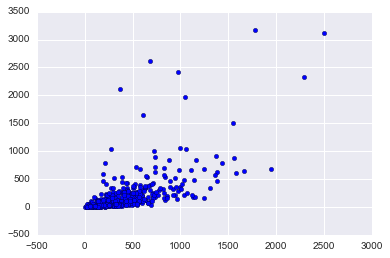

In [49]:
plt.scatter(df['Utilitarian'], df['ArtsN_2014'])
plt.show()

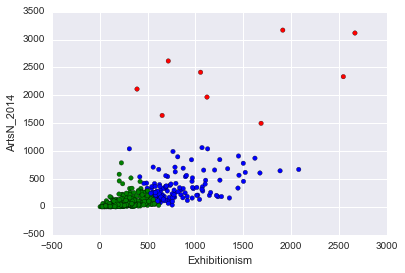

In [50]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = df[["Exhibitionism", "ArtsN_2014"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# Plot the data
colors = set_colors(labels)
plt.scatter(df["Exhibitionism"], df["ArtsN_2014"], c=colors)
plt.xlabel("Exhibitionism")
plt.ylabel("ArtsN_2014")
plt.show()

We see a division into three distinct groups, but by size of the zip code, and one thin outlier group on the top. 

## DBSCAN Clustering

In [51]:
df = pd.read_csv("nomiss_sample.csv")

# sns.clustermap(df[["JobsN_2014", "ArtsN_2014"]], method="complete")

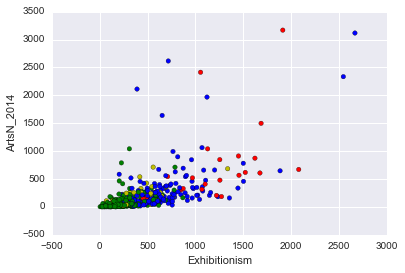

In [52]:
estimator = KMeans(n_clusters=4)

X = df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity', 'ArtsN_1998', 'JobsN_1998', 'ArtsN_1999', 'JobsN_1999', 'ArtsN_2000', 'JobsN_2000', 
        'ArtsN_2001', 'JobsN_2001', 'ArtsN_2002', 'JobsN_2002', 'ArtsN_2003', 'JobsN_2003', 'ArtsN_2004', 'JobsN_2004', 
        'ArtsN_2005', 'JobsN_2005', 'ArtsN_2006', 'JobsN_2006', 'ArtsN_2007', 'JobsN_2007', 'ArtsN_2008', 'JobsN_2008', 
        'ArtsN_2009', 'JobsN_2009', 'ArtsN_2010', 'JobsN_2010', 'ArtsN_2011', 'JobsN_2011', 'ArtsN_2012', 'JobsN_2012', 
        'ArtsN_2013', 'JobsN_2013', 'MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 'pctrental2k', 
        'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000', 'RentMed', 
        'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]

estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['Exhibitionism'], df['ArtsN_2014'], c=colors)
plt.xlabel("Exhibitionism")
plt.ylabel("ArtsN_2014")
plt.show()

In this cluster, the colors are mixed together, because all the variables are considered in the analysis. 

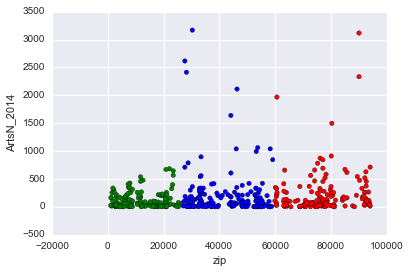

In [53]:
estimator = KMeans(n_clusters=3)
X = df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 'Neighborly', 'Formality',
        'Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
'Corporateness', 'Ethnicity', 'zip']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['zip'], df['ArtsN_2014'], c=colors)
plt.xlabel("zip")
plt.ylabel("ArtsN_2014")
plt.show()

In this last clustering, we see that the colors are divided by zip code number, into an East, Central, and West division of the country. 

As we can see from both plots, cluster analyses are not very helpful on defining patterns in the data. The dots get mixed into each other; and only the zip code is able to set them apart in different groups. 

## Autocorrelation

In [54]:
# Loading the data file in the LONG format. (Created in R)
df_long = pd.read_csv("nomisslong_sample.csv")

In [55]:
# How does autocorrelation vary in different ranges of years? For arts.

period_lag = range(1, 15)
auto_corrs_list = []
for x in period_lag:
    y = df_long['ArtsN'].autocorr(lag=x)
    auto_corrs_list.append(y)
    print x, y

1 -0.072502636837
2 -0.019333784748
3 -0.0178478604447
4 0.0309645387751
5 0.0216541111677
6 -0.00889121629323
7 -0.0186960378347
8 -0.0173698347505
9 0.024672532821
10 -0.0286070226386
11 0.0576784262754
12 -0.0554090035146
13 0.00399652061826
14 0.113967007957


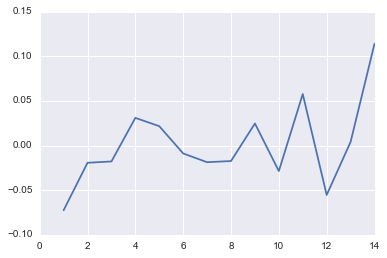

In [56]:
plt.plot(period_lag, auto_corrs_list)

In [57]:
# Testing autocorrelation for the lag between all time periods. For jobs. 

period_lag = range(1, 15)
auto_corrs_list = []
for x in period_lag:
    y = df_long['JobsN'].autocorr(lag=x)
    auto_corrs_list.append(y)
    print x, y

1 -0.0557095613078
2 -0.000309940872803
3 -0.034347826758
4 0.0749254779576
5 0.0873817495758
6 -0.0439491889978
7 0.00535665384213
8 -0.0621313993994
9 0.0848987354346
10 0.0114462365266
11 0.0527922117835
12 -0.0312721345734
13 -0.00816189407962
14 0.0561153772573


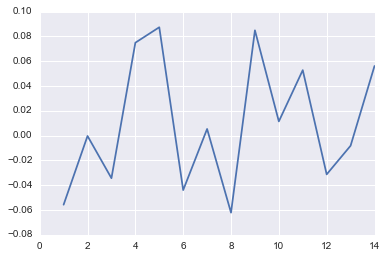

In [58]:
plt.plot(period_lag, auto_corrs_list)

One issue that was worrisome was autocorrelation between the years of analysis. 
By running the autocorrelation analysis with the different lags of years, we see that the autocorrelation is close to zero, confirming that the data is good to be run this way.

## Principal Component Analysis 

Raschka, Sebastian. Python Machine Learning. Packt Publishing, 2015. <br/>
Chapter 5. Compressing data via dimensionality reduction. 

In [61]:
#Loading the datafile. This is just a sample of the data. N=500
df = pd.read_csv("nomiss_sample.csv")

# Dropping unnecessary variables (Some string variables too, like names of the zip code location)
df.drop(['pctba90', 'racediversity90', 'medrent90', 'medhhinc90', 'meantrav90', 'meanlengthres90', 'pctsamehouse90',
'pctfemale90', 'pctmarried90', 'pctchild90', 'pctunemp90', 'diversityanc90', 'pctrental90', 'pctpov90', 'pctbike90',
'pctdrove90', 'pctwalk90', 'density1990', 'housingdensity1990', 'Pop1990', 'Unnamed: 0','JobsT_1998', 'ArtsW_1998', 'JobsW_1998', 
'ArtSupport_1998', 'JobsT_1999', 'ArtsW_1999', 'JobsW_1999', 'ArtSupport_1999', 'JobsT_2000', 'ArtsW_2000', 'JobsW_2000',
 'ArtSupport_2000', 'JobsT_2001', 'ArtsW_2001', 'JobsW_2001', 'ArtSupport_2001', 'JobsT_2002', 'ArtsW_2002', 'JobsW_2002',
 'ArtSupport_2002', 'JobsT_2003', 'ArtsW_2003', 'JobsW_2003', 'ArtSupport_2003', 'JobsT_2004', 'ArtsW_2004', 'JobsW_2004',
 'ArtSupport_2004', 'JobsT_2005', 'ArtsW_2005', 'JobsW_2005', 'ArtSupport_2005', 'JobsT_2006', 'ArtsW_2006', 'JobsW_2006',
 'ArtSupport_2006', 'JobsT_2007', 'ArtsW_2007', 'JobsW_2007', 'ArtSupport_2007', 'JobsT_2008', 'ArtsW_2008', 'JobsW_2008',
 'ArtSupport_2008', 'JobsT_2009', 'ArtsW_2009', 'JobsW_2009', 'ArtSupport_2009', 'JobsT_2010', 'ArtsW_2010', 'JobsW_2010',
 'ArtSupport_2010', 'JobsT_2011', 'ArtsW_2011', 'JobsW_2011', 'ArtSupport_2011', 'JobsT_2012', 'ArtsW_2012', 'JobsW_2012',
 'ArtSupport_2012', 'JobsT_2013', 'ArtsW_2013', 'JobsW_2013', 'ArtSupport_2013', 'JobsT_2014', 'ArtsW_2014',
 'JobsW_2014', 'ArtSupport_2014', 'ARTGOSLG98', 'City', 'State', 'Location', 'zipcode'], axis=1, inplace=True)

# Creating a change variables for the arts
df['arts_change'] = df['ArtsN_2014'] - df['ArtsN_1998']

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into train and test datasets.

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [63]:
# Calculating the eigen values 

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[  3.84759847e+01   6.64879858e+00   5.74122620e+00   4.21196787e+00
   3.28637743e+00   3.17158218e+00   2.11821397e+00   1.86450735e+00
   1.32389618e+00   1.07431379e+00   8.67753716e-01   8.18758540e-01
   7.69169468e-01   6.40226090e-01   5.83889447e-01   5.10998281e-01
   4.90045029e-01   4.33421902e-01   3.71820759e-01   3.29093320e-01
   3.15173645e-01   2.66389623e-01   2.26618224e-01   1.89747378e-01
   1.61724436e-01   1.57061716e-01   1.48490472e-01   1.28953546e-01
   1.04307561e-01   1.01508412e-01   9.64751684e-02   8.12232376e-02
   7.82863208e-02   6.26708675e-02   6.90351288e-02   4.73328390e-02
   3.35180860e-02   2.34682315e-02   2.88023694e-02   2.98467911e-02
   1.87975663e-02   1.47418646e-02   1.36597106e-02   1.15071475e-02
   1.11376125e-02   1.01597971e-02   8.86414790e-03   7.88751460e-03
   7.10861083e-03   4.70237038e-03   4.56230501e-03   3.90741973e-03
   3.20786696e-03   2.83740019e-03   2.26716814e-03   1.80020042e-03
   1.61717948e-03   

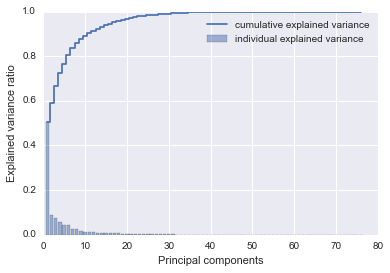

In [64]:
#Plotting the eigenpairs

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,77), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,77), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

The first principal component explains about 50% of the variance, and the other 50% is explained by the other variables in the dataset. But what is that thing?

In [65]:
#Sorting eigenpairs on descending order

eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) 
              for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [66]:
# Collect the two eigenvectors that correspond to the two largest values.

w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

('Matrix W:\n', array([[-0.10153017, -0.12168904],
       [-0.1452461 ,  0.10469681],
       [-0.10663573, -0.1152029 ],
       [-0.14524148,  0.10426139],
       [-0.10233959, -0.12887076],
       [-0.1468721 ,  0.09764909],
       [-0.1035983 , -0.15946119],
       [-0.1471814 ,  0.09000591],
       [-0.10522959, -0.14987108],
       [-0.14701094,  0.08904838],
       [-0.12275143, -0.14052805],
       [-0.14576976,  0.09146686],
       [-0.13160527, -0.12525244],
       [-0.14470504,  0.09493347],
       [-0.1344431 , -0.13070369],
       [-0.14511037,  0.09340443],
       [-0.13200463, -0.13984694],
       [-0.14467974,  0.0959579 ],
       [-0.13361894, -0.1293093 ],
       [-0.1446317 ,  0.08698916],
       [-0.12216518, -0.1528691 ],
       [-0.14446192,  0.08577544],
       [-0.11871437, -0.15991274],
       [-0.14495832,  0.08265665],
       [-0.11833748, -0.16120748],
       [-0.14517079,  0.08403987],
       [-0.11841197, -0.15175495],
       [-0.14578556,  0.07972293],
    

In [67]:
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

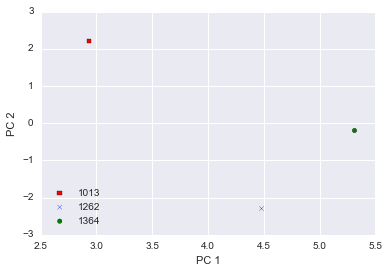

In [68]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

This PCA analysis did not show us much. 

### PCA on scikit-learn

In [69]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

In [72]:
### Seems right, but this almost exploded my computer!!! 

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)

X_test_pca = pca.transform(X_test_std)


lr.fit(X_train_pca, y_train)

IndexError: tuple index out of range

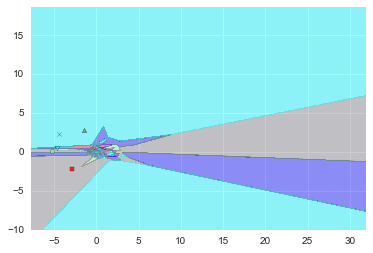

In [76]:
# This line takes about 30 minutes to run, and show an error, and a clustering plot that says very little. 
# IndexError: tuple index out of range

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

## Time Series Analysis 

In [5]:
# Loading the data file in the LONG format. (Created in R)
df_long = pd.read_csv("nomisslong_sample.csv")

df_long['Total'] = df_long['ArtsN'] + df_long['JobsN']

In [99]:
# How to make pandas understand that this is a years column so that I can use the resampling, and be sure it is using 
# year, not zip code.

# Trying with period objects.
df_long["time"] = pd.Period(df_long["time"], freq="a")

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Trying to make the time column be understood as year, but I can't! Any plot that I make will show by zip code, not by time. How to resample in this case? 

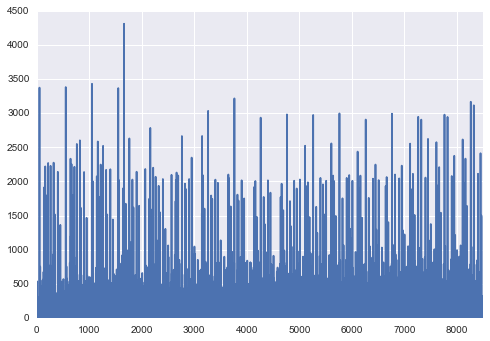

In [6]:
# If not specified, the graph showss how arts varies per zip code. 

df_long['ArtsN'].plot()

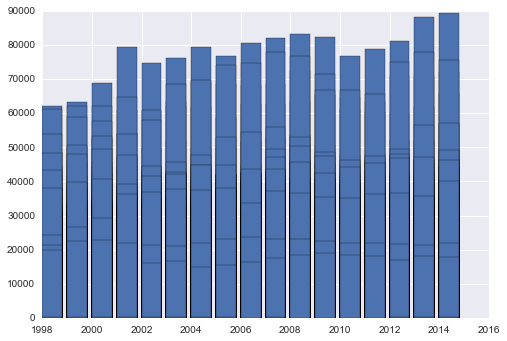

In [18]:
# How arts vary per year. (Doesn't look good, though)

p1 = plt.bar(df_long['time'], df_long['ArtsN'], color = 'r')
p2 = plt.bar(df_long['time'], df_long['Total'], color = 'c', bottom =  df_long['ArtsN'])

There is no clear seasonality between the years, in either arts or jobs. But how can I improve these graphs? 

TypeError: 'AxesSubplot' object has no attribute '__getitem__'

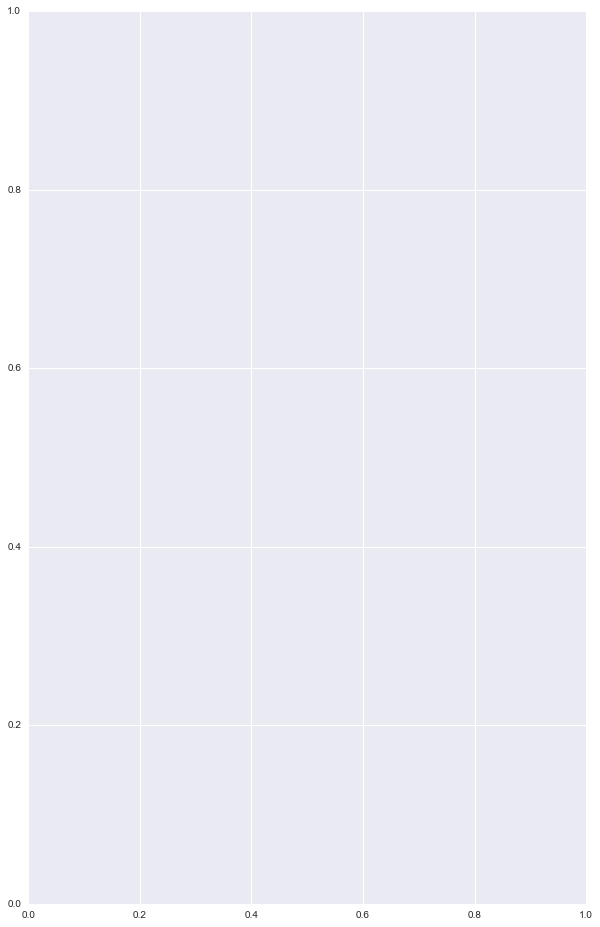

In [20]:
# Create the general blog and the "subplots" i.e. the bars
f, df_long = plt.subplots(1, figsize=(10,16))

# Set the bar width
bar_width = 0.3

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df_long['Total']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar plot, in position bar_1
df_long.bar(bar_l, 
        # using the pre_score data
        df_long['Total'], 
        # set the width
        width=bar_width,
        # with the label pre score
        label='Total', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='c')

# Create a bar plot, in position bar_1
df_long.bar(bar_l, 
        # using the post_score data
        df_long['ArtsN'], 
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(df['Arts'])], 
        # with the label post score
        label='Arts', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F1BD1A')

# set the x ticks with names
plt.xticks(tick_pos, df_long['first_name'])

# Set the label and legends
df_long.set_ylabel("Total Score")
df_long.set_xlabel("Test Subject")
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])